* MSV_HoVaTen:
521H0501_Phan Minh Hoàng,
521H0398_Lê Nguyễn Viết Hiệp,
521H0276_Trang Sĩ Nam



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bike_buyers.csv')

In [3]:
data = data.dropna()

In [4]:
data.duplicated().value_counts()

False    952
Name: count, dtype: int64

In [5]:
data = data.drop_duplicates()

* Transformation

In [6]:
# Tranform data
from sklearn.preprocessing import LabelEncoder

types = data.dtypes
names = list(data.columns)

le = LabelEncoder()
for i in range(len(types)):
    if types.iloc[i]=='object':
        le.fit_transform(data[names[i]])
        data[names[i]] = le.transform(data[names[i]])

* Normalization


In [7]:
from sklearn.preprocessing import MinMaxScaler
features = data.drop(['Purchased Bike'], axis=1)

scaler = MinMaxScaler()
model= scaler.fit(features)
scaled_data= pd.DataFrame(model.transform(features))

* Feature Selection

In [8]:
# split data
X = scaled_data
y = data['Purchased Bike']

<Axes: >

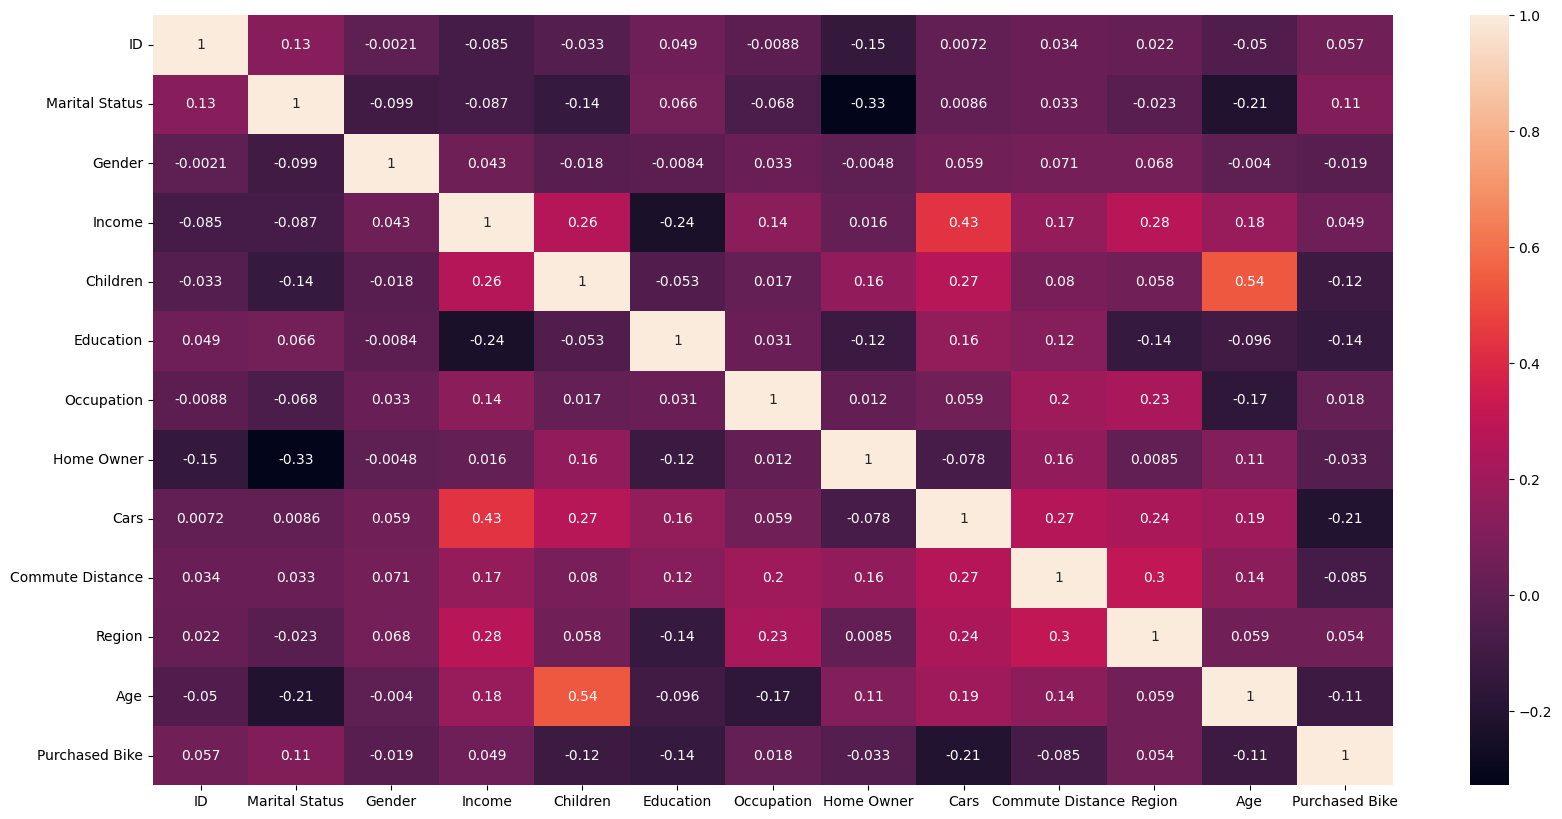

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

In [10]:
data = data.drop(['ID'], axis=1)

* FFNN

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

ImportError: Traceback (most recent call last):
  File "c:\Users\binbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\__init__.py", line 54, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "c:\Users\binbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 28, in <module>
    _pywrap_tensorflow = swig_import_helper()
                         ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\binbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 15, in swig_import_helper
    import imp
ModuleNotFoundError: No module named 'imp'


Error importing tensorflow.  Unless you are using bazel,
you should not try to import tensorflow from its source directory;
please exit the tensorflow source tree, and relaunch your python interpreter
from there.

In [ ]:
model = tf.keras.models.Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.2))  # Add Dropout after the first layer
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(2, activation='tanh'))

Cải thiện model

In [ ]:
##########################################################
#Cải thiện mô hình bằng cách xoá layer băng pop và dropout
model.pop()  # Remove the last dense layer
model.pop()  # Remove the second last dense layer
model.add(Dropout(0.2))
##########################################################

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Sử dụng EarlyStopping

In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
model.fit(X_train, Y_train, epochs=200, batch_size=512, callbacks=[earlystopping])

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

6/6 [==============================] - 1s 15ms/step - loss: 0.6796 - accuracy: 0.6492
Test accuracy: 64.92%
